<a href="https://colab.research.google.com/github/rishav197/SML-assignments-IIITD/blob/main/A2/SML_A2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing some important libraries
from keras.datasets import mnist
import numpy as np
import pandas as pd

In [ ]:
#data loaded in splitted manner
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, type(X_train))
print(X_test.shape, type(X_test))

(60000, 28, 28) <class 'numpy.ndarray'>
(10000, 28, 28) <class 'numpy.ndarray'>


In [ ]:
# print(X_train)
print(y_train[0], type(y_train[0]))

5 <class 'numpy.uint8'>


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# total 10 classes from 0 to 9
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# len(y_train)
y_train[1]

0

In [ ]:
class0_idxs = [] #list contains indices where the label is 0
class1_idxs = [] #list contains indices where the label is 1

for i in range(len(y_train)):
  if(len(class0_idxs)>4):
    break
  else:
    if(y_train[i]==0): #comparing for class 0
      class0_idxs.append(i)

for i in range(len(y_train)):
  if(len(class1_idxs)>4):
    break
  else:
    if(y_train[i]==1): #comparing for class 1
      class1_idxs.append(i)

print(class0_idxs)
print(class1_idxs)

[1, 21, 34, 37, 51]
[3, 6, 8, 14, 23]


##Part a) visualization of 5 samples from class 0 and class 1

In [ ]:
import matplotlib.pyplot as plt

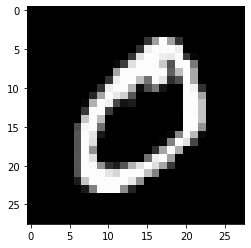

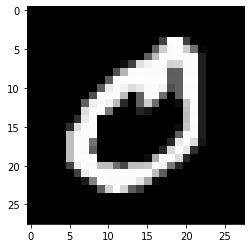

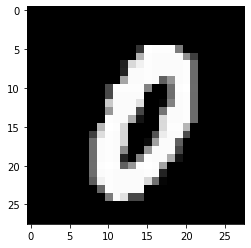

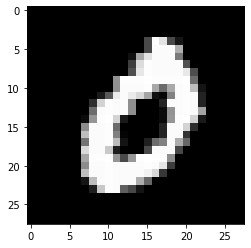

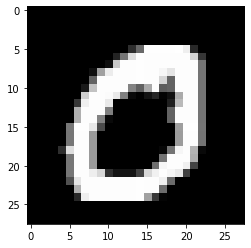

In [ ]:
for idx in class0_idxs:
  plt.imshow(X_train[idx], cmap=plt.get_cmap('gray'))
  plt.show()

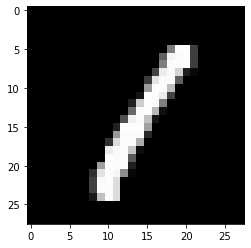

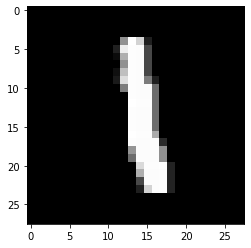

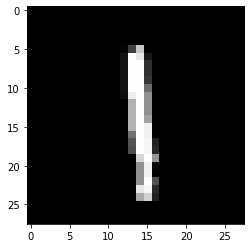

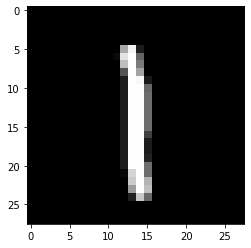

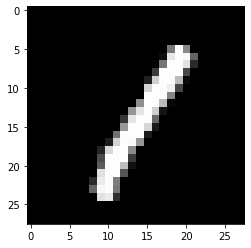

In [ ]:
for idx in class1_idxs:
  plt.imshow(X_train[idx], cmap=plt.get_cmap('gray'))
  plt.show()

##Part b)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# X_train[0]

In [ ]:
len(X_train)

60000

In [ ]:
# Function for removing samples other than of class 0, 1

def getData(X_train, y_train):
  # pass
  class0_idxs = []
  class1_idxs = []

  for i in range(len(y_train)):
    if(y_train[i]==0): #comparing for class 0
      class0_idxs.append(i)

  for i in range(len(y_train)):
    if(y_train[i]==1): #comparing for class 1
      class1_idxs.append(i)

  # print(len(class0_idxs), class0_idxs)
  # print(len(class1_idxs), class1_idxs)

  class01_idxs = class0_idxs + class1_idxs
  class01_idxs.sort()
  # print(len(class01_idxs), class01_idxs)


  X_train_new = [] 
  y_train_new = []
  for idx in class01_idxs:
    # print(i, end=" ")
    X_train_new.append(X_train[idx])
    y_train_new.append(y_train[idx])

  X_train_new = np.asarray(X_train_new, dtype='uint8')
  y_train_new = np.asarray(y_train_new, dtype='uint8')
  
  return X_train_new, y_train_new

X_train_new and y_train_new

In [ ]:
# we get train data having only class 0 and 1 labels
X_train_new, y_train_new = getData(X_train, y_train)
# print(len(y_train_new), y_train_new)
# print(len(X_train_new), X_train_new)

# plt.imshow(X_train_new[12665-1], cmap=plt.get_cmap('gray'))
# plt.show()

#flatten each image into 784 features
size_img_vector = 28*28
X_train_new = X_train_new.reshape(X_train_new.shape[0], size_img_vector)

# pd.DataFrame(X_train_new)

In [ ]:
X_train_new.shape

(12665, 784)

In [ ]:
y_train_new

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

X_test_new and y_test_new

In [ ]:
# we get test data having only class 0 and 1 labels
X_test_new, y_test_new = getData(X_test, y_test)
# print(len(y_test_new), y_test_new)
# print(len(X_test_new), X_test_new)
print(X_test_new.shape)

# plt.imshow(X_test_new[2115-1], cmap=plt.get_cmap('gray'))
# plt.show()

#flatten images into 784 features as input data
size_img_vector = 28*28
X_test_new = X_test_new.reshape(X_test_new.shape[0], size_img_vector)

# pd.DataFrame(X_test_new)

(2115, 28, 28)


In [ ]:
X_test_new.shape

(2115, 784)

In [ ]:
y_test_new

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [ ]:
import numpy as np

In [ ]:
def PCA(X, num_Of_Components):
  #calculating mean across all featurs of X
  X_mean = X - np.mean(X, axis=0)
  # print(X.shape)

  #calculating Covariance matrix 
  cov_matx = np.cov(X_mean, rowvar=False)
  # print(cov_matx.shape)

  eigen_vals, eigen_vects = np.linalg.eigh(cov_matx)
  # print(eigen_vects.shape)
  # print(eigen_vals.shape)
  # print(eigen_vals, len(eigen_vals))

  sorted_idxs = np.argsort(eigen_vals)[::-1]
  # print(sorted_idxs)
  sorted_eigenVals = eigen_vals[sorted_idxs]
  # print(sorted_eigenVals)
  sorted_eigenVectors = eigen_vects[:,sorted_idxs]
  # print(sorted_eigenVectors)

  #Now, we get a subset of selected eigen vectors
  eigenVects_subset = sorted_eigenVectors[:,0:num_Of_Components]
  # print(eigenVects_subset.shape)

  # reducing data with given num of components
  X_new = np.dot(eigenVects_subset.transpose(), X_mean.transpose()).transpose()
  # print(X_new.shape)

  return X_new, eigen_vects


##Part c)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

(12665, 2)


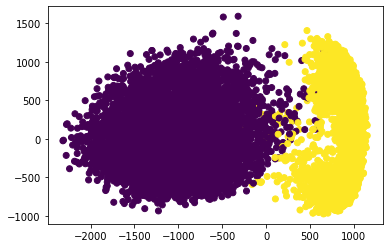

(12665, 3)


/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


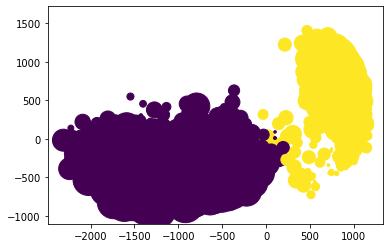

In [ ]:
n = 2 #no. of components
X_train_red, _ = PCA(X_train_new, n)
print(X_train_red.shape)


# print(len(X_train_red[:,0]), X_train_red[:,0])

plt.scatter(X_train_red[:,0], X_train_red[:,1], c=y_train_new)
plt.show()


n = 3 #no of components
X_train_red, _ = PCA(X_train_new, n)
print(X_train_red.shape)

plt.scatter(X_train_red[:,0], X_train_red[:,1], X_train_red[:,2], c=y_train_new)
plt.show()

In [ ]:
pd.DataFrame(X_train_red)

,0,1,2
0,-1119.663388,321.497910,-402.411416
1,883.615892,907.386295,622.503551
2,798.393094,-842.909712,-484.062797
3,863.614849,-752.822365,-363.947142
4,898.965176,-706.871855,-275.507597
...,...,...,...
12660,-807.485744,719.262248,-978.667043
12661,923.824668,573.430566,554.928473
12662,726.574010,652.364352,528.079711
12663,-816.368589,679.558542,-625.934840


##Part d)

Reconstructing the original data

In [ ]:
def reconstruction(X_train_new, V):

  X_train_new_mean = X_train_new - np.mean(X_train_new, axis=0)
  # print(X_train_new_mean.shape)

  recons_X = np.dot(X_train_new, V.transpose()) + X_train_new_mean
  return recons_X

In [ ]:
import math

In [ ]:
lst_components = [2, 3, 5, 8, 10, 15]


loss_arr = []
for i in range(len(lst_components)):
  # print(lst_components[i])
  _, eigen_vects = PCA(X_train_new, lst_components[i])
  # print(X_reduced.shape)

  reconst_data = reconstruction(X_train_new, eigen_vects)
  # print(reconst_data.shape)

  orignal_data = X_train_new
  # print(orignal_data.shape)

  loss = np.sum((orignal_data - reconst_data) ** 2, axis=1).mean()
  loss_arr.append(math.floor(loss))

print(len(loss_arr), loss_arr)

6 [7530528, 7530528, 7530528, 7530528, 7530528, 7530528]


In [ ]:
import matplotlib.pyplot as plt

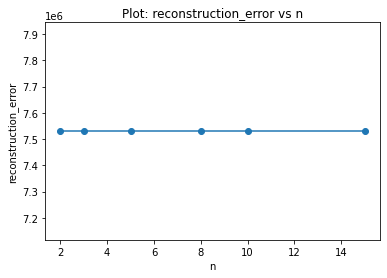

In [ ]:
plt.plot(lst_components, loss_arr)
plt.scatter(lst_components, loss_arr)
plt.title("Plot: reconstruction_error vs n")
plt.ylabel("reconstruction_error")   
plt.xlabel("n")
plt.show()

##Part e)

PCA followed by LDA

n = 2

In [ ]:
n = lst_components[0]
print("n = {}".format(n))

#applying PCA for n=2
X_train_reduced,_ = PCA(X_train_new, n)
# print(X_train_reduced.shape)

X_test_reduced,_ = PCA(X_test_new, n)
# print(X_test_reduced.shape)

# applying standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_reduced)
X_test = sc.transform(X_test_reduced)

# applying LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train_new)
X_test = lda.transform(X_test)

# now, we took logistic regression model in order to calculate accuracy 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)
y_pred = lr.predict(X_test)
# print(y_pred.shape)
# print(y_test_new.shape)

# calculating accuracy
from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test_new, y_pred)))

n = 2
accuracy = 0.9966903073286052


n = 3

In [ ]:
n = lst_components[1]
print("n = {}".format(n))

#applying PCA for n=3
X_train_reduced,_ = PCA(X_train_new, n)
# print(X_train_reduced.shape)

X_test_reduced,_ = PCA(X_test_new, n)
# print(X_test_reduced.shape)

# applying Std scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_reduced)
X_test = sc.transform(X_test_reduced)

# applying LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train_new)
X_test = lda.transform(X_test)

# now, we took logistic regression model in order to calculate accuracy 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)
y_pred = lr.predict(X_test)
# print(y_pred.shape)
# print(y_test_new.shape)

# calculating accuracy
from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test_new, y_pred)))

n = 3
accuracy = 0.9971631205673759


n = 5

In [ ]:
n = lst_components[2]
print("n = {}".format(n))

X_train_reduced,_ = PCA(X_train_new, n)
# print(X_train_reduced.shape)

X_test_reduced,_ = PCA(X_test_new, n)
# print(X_test_reduced.shape)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_reduced)
X_test = sc.transform(X_test_reduced)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train_new)
X_test = lda.transform(X_test)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)
y_pred = lr.predict(X_test)
# print(y_pred.shape)
# print(y_test_new.shape)


from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test_new, y_pred)))

n = 5
accuracy = 0.9957446808510638


n = 8

In [ ]:
n = lst_components[3]
print("n = {}".format(n))

X_train_reduced,_ = PCA(X_train_new, n)
# print(X_train_reduced.shape)

X_test_reduced,_ = PCA(X_test_new, n)
# print(X_test_reduced.shape)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_reduced)
X_test = sc.transform(X_test_reduced)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train_new)
X_test = lda.transform(X_test)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)
y_pred = lr.predict(X_test)
# print(y_pred.shape)
# print(y_test_new.shape)


from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test_new, y_pred)))

n = 8
accuracy = 0.991016548463357


n = 10

In [ ]:
n = lst_components[4]
print("n = {}".format(n))

X_train_reduced,_ = PCA(X_train_new, n)
# print(X_train_reduced.shape)

X_test_reduced,_ = PCA(X_test_new, n)
# print(X_test_reduced.shape)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_reduced)
X_test = sc.transform(X_test_reduced)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train_new)
X_test = lda.transform(X_test)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)
y_pred = lr.predict(X_test)
# print(y_pred.shape)
# print(y_test_new.shape)


from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test_new, y_pred)))

n = 10
accuracy = 0.9929078014184397


n = 15

In [ ]:
n = lst_components[5]
print("n = {}".format(n))

X_train_reduced,_ = PCA(X_train_new, n)
# print(X_train_reduced.shape)

X_test_reduced,_ = PCA(X_test_new, n)
# print(X_test_reduced.shape)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_reduced)
X_test = sc.transform(X_test_reduced)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train_new)
X_test = lda.transform(X_test)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train_new)
y_pred = lr.predict(X_test)
# print(y_pred.shape)
# print(y_test_new.shape)


from sklearn.metrics import accuracy_score
print("accuracy = {}".format(accuracy_score(y_test_new, y_pred)))

n = 15
accuracy = 0.9905437352245863
